In [1]:
from statslibx.datasets import load_dataset
from statslibx import DescriptiveStats, InferentialStats, UtilsStats

stats = DescriptiveStats(data=load_dataset("iris.csv"))
stats.data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
stats.summary()

                                 RESUMEN DE ESTADÍSTICA DESCRIPTIVA                                 
Fecha: 2025-12-14 21:55:18
Variables analizadas: 4
----------------------------------------------------------------------------------------------------

                                       VARIABLE: sepal_length                                       
----------------------------------------------------------------------------------------------------

Medidas de Tendencia Central:
  Conteo                                                  150
  Media                                              5.843333
  Mediana                                            5.800000
  Moda                                               5.000000

Medidas de Dispersión:
  Desviación Estándar                                0.828066
  Varianza                                           0.685694
  Rango Intercuartílico (IQR)                        1.300000

Cuartiles y Rango:
  Mínimo                           

In [3]:
stats.summary().to_dataframe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
median,5.800000,3.000000,4.350000,1.300000
mode,5.000000,3.000000,1.500000,0.200000
std,0.828066,0.433594,1.764420,0.763161
variance,0.685694,0.188004,3.113179,0.582414
iqr,1.300000,0.500000,3.500000,1.500000
min,4.300000,2.000000,1.000000,0.100000
q1,5.100000,2.800000,1.600000,0.300000
q3,6.400000,3.300000,5.100000,1.800000


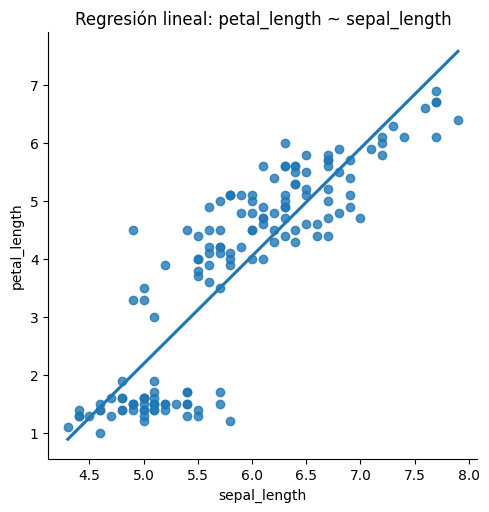

                                   RESULTADOS DE REGRESIÓN LINEAL                                   
Variable Dependiente: petal_length
Variables Independientes: sepal_length
Motor: statsmodels
Fecha: 2025-12-14 21:55:20
----------------------------------------------------------------------------------------------------

INFORMACIÓN DEL MODELO:
----------------------------------------------------------------------------------------------------
Estadístico                                                       Valor
----------------------------------------------------------------------------------------------------
R-cuadrado                                                     0.759955
R-cuadrado Ajustado                                            0.758333
Estadístico F                                                468.551862
Prob (F-estadístico)                                       1.038454e-47
AIC                                                          384.985365
BIC                

In [4]:
modelo = stats.linear_regression(X="sepal_length", y="petal_length", show_plot=True)
modelo

In [21]:
import pandas as pd

data = pd.read_csv(r"statslibx\datasets\penguins.csv")
data


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [26]:
data.shape

(344, 7)

In [212]:
import numpy as np


def _format_nulls(column, null_values):

    no_null_values = data.shape[0] - null_values
    print(f"Columna: {column}")
    print("Valores Nulos: ", null_values)
    print("Valores No Nulos: ", no_null_values)

for column in data.columns:
    try:
        null = data[column].isna().value_counts().to_dict().pop(True)
    except:
        null = 0
    
    _format_nulls(column, null)





Columna: species
Valores Nulos:  0
Valores No Nulos:  344
Columna: island
Valores Nulos:  0
Valores No Nulos:  344
Columna: bill_length_mm
Valores Nulos:  2
Valores No Nulos:  342
Columna: bill_depth_mm
Valores Nulos:  2
Valores No Nulos:  342
Columna: flipper_length_mm
Valores Nulos:  2
Valores No Nulos:  342
Columna: body_mass_g
Valores Nulos:  2
Valores No Nulos:  342
Columna: sex
Valores Nulos:  11
Valores No Nulos:  333


In [215]:
data.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64